<a href="https://colab.research.google.com/github/ToHLz/Machine-learning/blob/main/Student_Performance_In_Exam_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXPLORATIVE DATA ANALYSIS (EDA)**

In [ ]:
# We need to import a wide variety of libraries to help perform the EDA properly
# For this, we will import pandas, numpy, seaborn and matplotlib libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# This shows an overhead view of the dataframe.
# This shows the first 5 rows of the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# This is used to check the number of rows and columns contained in the dataset
df.shape

(1000, 8)

In [ ]:
# This gives more information on the datatype in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#This helps to understand the statistical properties of the numerical variables in the data frame
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# This helps to understand each column and check out for missing values
# Count null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

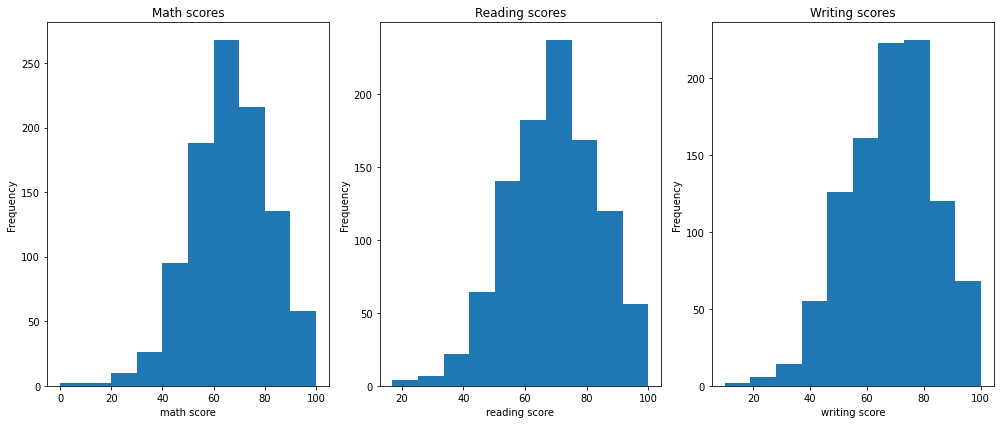

In [ ]:
# This shows the class distribution of student performance in math, reading and writing respectively
plt.figure(figsize=(14,6))

plt.subplot(1,3,1) # the figure has one row, 2 columns and this is the 1st plot
df['math score'].plot(kind='hist')
plt.title('Math scores')
plt.xlabel('math score')
plt.tight_layout()

plt.subplot(1,3,2)
df['reading score'].plot(kind='hist')
plt.title('Reading scores')
plt.xlabel('reading score')
plt.tight_layout()

plt.subplot(1,3,3)
df['writing score'].plot(kind='hist')
plt.title('Writing scores')
plt.xlabel('writing score')
plt.tight_layout()

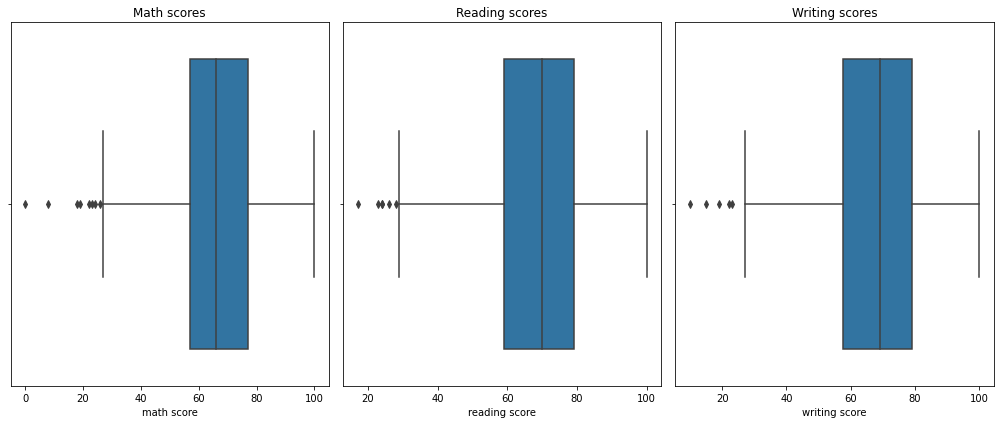

In [ ]:
# This shows the statistical analysis of students performance in math, reading and writing respectively

plt.figure(figsize=(14,6))

plt.subplot(1,3,1)# the figure has one row, 2 columns and this is the 1st plot
sns.boxplot(data= df, x = 'math score')
plt.title('Math scores')
plt.tight_layout()

plt.subplot(1,3,2)
sns.boxplot(data= df, x = 'reading score')
plt.title('Reading scores')
plt.tight_layout()

plt.subplot(1,3,3)
sns.boxplot(data= df, x = 'writing score')
plt.title('Writing scores')
plt.tight_layout()

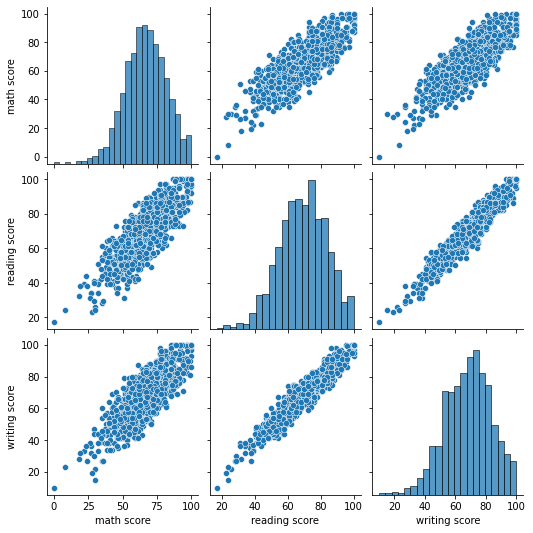

In [ ]:
sns.pairplot(df)

In [ ]:
df['Total'] = df['math score'] + df['reading score'] + df['writing score']

In [ ]:
df['Average'] = df['Total']/3

In [ ]:
df['math_PassStatus'] = np.where(df['math score'] < 40, 'F', 'P')

In [ ]:
df['reading_PassStatus'] = np.where(df['reading score'] < 40, 'F', 'P')

In [ ]:
df['writing_PassStatus'] = np.where(df['writing score'] < 40, 'F', 'P')

In [ ]:
df['Average'] = np.where(df['Average'] < 50, 'F', 'P')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average,math_PassStatus,reading_PassStatus,writing_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F,P,P,P
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P


In [ ]:
#This is to know the amoutnt of students that passed and failed Maths
df['math_PassStatus'].value_counts()

P    960
F     40
Name: math_PassStatus, dtype: int64

In [ ]:
#This is to know the amoutnt of students that passed and failed Writing
df['writing_PassStatus'].value_counts()

P    968
F     32
Name: writing_PassStatus, dtype: int64

In [ ]:
#This is to know the amoutnt of students that passed and failed Reading
df['reading_PassStatus'].value_counts()

P    974
F     26
Name: reading_PassStatus, dtype: int64

In [ ]:
#This is to know the amoutnt of students that passed and failed in total
df['Average'].value_counts()

P    897
F    103
Name: Average, dtype: int64

In [ ]:
for items in df.columns[-3]:
  sns.boxplot(x=df['test preparation course'], y=df[item])
  plt.title(item+"vs pre test", loc="left")
  plt.show()

In [ ]:
for items in df.columns[-3]:
  sns.boxplot(x=df['lunch'], y=df[item])
  plt.title(item+"vs lunch", loc="left")
  plt.show()

In [ ]:
correlation = df.corr()

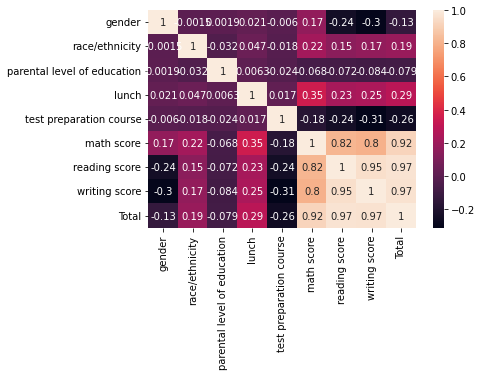

In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

**SIMPLE LINEAR REGRESSION MODEL**


In [ ]:
# We need to import a wide variety of libraries to help perform the Simple Linear Regression model properly
# For this, we will import pandas, numpy, sklearn and matplotlib libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
writing= df['writing score']
reading = df['reading score']

In [ ]:
x = np.array(reading).reshape(-1,1)
y = np.array(writing)

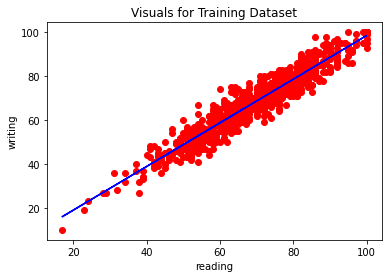

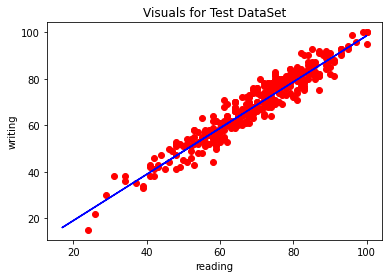

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=1/3, random_state=0)

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest)

plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("reading")
plt.ylabel("writing")
plt.show()

plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("reading")
plt.ylabel("writing")
plt.show()

**DECISION TREE CLASSIFIER**

In [ ]:
#import required libraries
import numpy as np
import pandas as pd

In [ ]:
Performance = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/StudentsPerformance.csv')
Performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
Performance['Total'] = Performance['math score'] + Performance['reading score'] + Performance['writing score']

In [ ]:
Performance['Average'] = Performance['Total']/3

In [ ]:
Performance['math_PassStatus'] = np.where(Performance['math score'] < 40, 'F', 'P')
Performance['writing_PassStatus'] = np.where(Performance['writing score'] < 40, 'F', 'P')
Performance['reading_PassStatus'] = np.where(Performance['reading score'] < 40, 'F', 'P')
Performance['Average'] = np.where(Performance['Average'] < 50, 'F', 'P')

In [ ]:
Performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average,math_PassStatus,writing_PassStatus,reading_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F,P,P,P
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,P,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,172,P,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,195,P,P,P,P
998,female,group D,some college,standard,completed,68,78,77,223,P,P,P,P


In [ ]:
Performance.drop(['gender', 'math score', 'reading score', 'writing score','Total', 'math_PassStatus', 'reading_PassStatus', 'writing_PassStatus'],axis = 1, inplace = True)
Performance.head()

,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,group B,bachelor's degree,standard,none,P
1,group C,some college,standard,completed,P
2,group B,master's degree,standard,none,P
3,group A,associate's degree,free/reduced,none,F
4,group C,some college,standard,none,P


In [ ]:
Performance.drop(['race/ethnicity'],axis = 1, inplace = True)
Performance.head()

,parental level of education,lunch,test preparation course,Average
0,bachelor's degree,standard,none,P
1,some college,standard,completed,P
2,master's degree,standard,none,P
3,associate's degree,free/reduced,none,F
4,some college,standard,none,P


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

Performance['parental level of education'] = Le.fit_transform(Performance['parental level of education'])
Performance['lunch'] = Le.fit_transform(Performance['lunch'])
Performance['test preparation course'] = Le.fit_transform(Performance['test preparation course'])
Performance['Average'] = Le.fit_transform(Performance['Average'])

Performance

,parental level of education,lunch,test preparation course,Average
0,1,1,1,1
1,4,1,0,1
2,3,1,1,1
3,0,0,1,0
4,4,1,1,1
...,...,...,...,...
995,3,1,0,1
996,2,0,1,1
997,2,0,0,1
998,4,1,0,1


In [ ]:
y = Performance['Average']
X = Performance.drop(['Average'],axis=1)

In [ ]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.5517241379310345, 0.9285714285714286, 'X[1] <= 0.5\nentropy = 0.478\nsamples = 1000\nvalue = [103, 897]'),
 Text(0.3275862068965517, 0.7857142857142857, 'X[2] <= 0.5\nentropy = 0.662\nsamples = 355\nvalue = [61, 294]'),
 Text(0.1724137931034483, 0.6428571428571429, 'X[0] <= 2.5\nentropy = 0.442\nsamples = 131\nvalue = [12, 119]'),
 Text(0.06896551724137931, 0.5, 'X[0] <= 0.5\nentropy = 0.513\nsamples = 70\nvalue = [8, 62]'),
 Text(0.034482758620689655, 0.35714285714285715, 'entropy = 0.48\nsamples = 29\nvalue = [3, 26]'),
 Text(0.10344827586206896, 0.35714285714285715, 'X[0] <= 1.5\nentropy = 0.535\nsamples = 41\nvalue = [5, 36]'),
 Text(0.06896551724137931, 0.21428571428571427, 'entropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.13793103448275862, 0.21428571428571427, 'entropy = 0.544\nsamples = 24\nvalue = [3, 21]'),
 Text(0.27586206896551724, 0.5, 'X[0] <= 4.5\nentropy = 0.349\nsamples = 61\nvalue = [4, 57]'),
 Text(0.2413793103448276, 0.35714285714285715, 'X[0] <= 3.

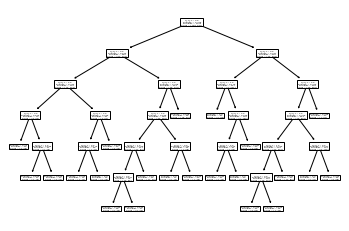

In [ ]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

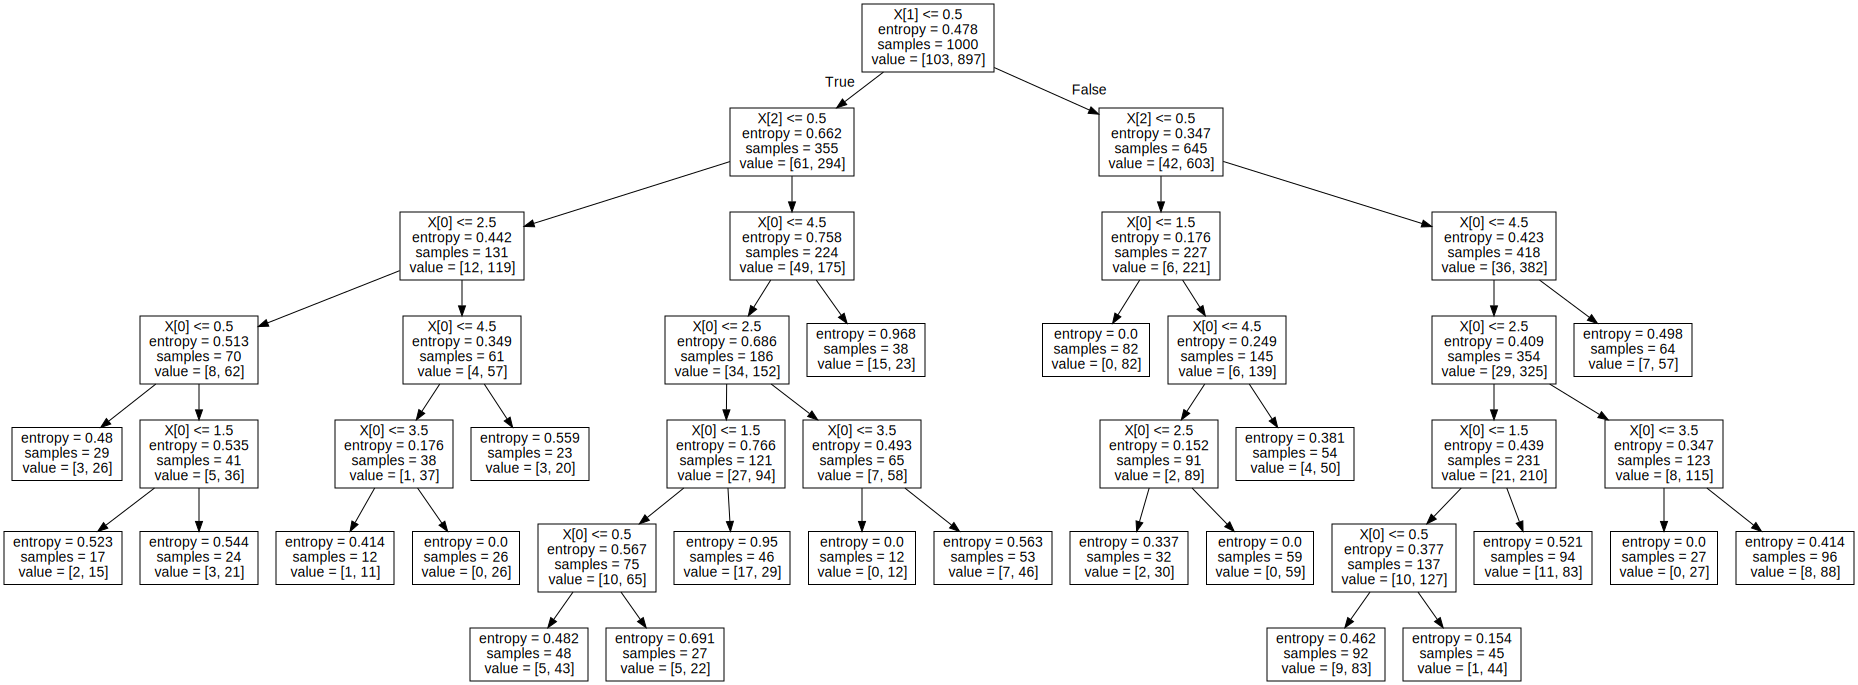

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In the above graph,

X[0] -> Parental level of education, X[1] -> Lunch, X[2] -> test preparation course

In [ ]:
# The predictions are stored in X_pred
# verifying if the model has predicted it all right.
X_pred = clf.predict(X)
X_pred == y

0       True
1       True
2       True
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: Average, Length: 1000, dtype: bool

**UNSUPERVISED LEARNING**

**Hierarchical Clustering Model**

In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv("https://raw.githubusercontent.com/ToHLz/Machine-learning/main/StudentsPerformance.csv")
data1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data1['Total'] = data1['math score'] + data1['reading score'] + data1['writing score']

In [ ]:
data1['Average'] = data1['Total']/3

In [ ]:
data1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
data1.drop(['math score', 'reading score', 'writing score', 'Total'],axis = 1, inplace = True)
data1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data1['parental level of education'] = Le.fit_transform(data1['parental level of education'])
data1['lunch'] = Le.fit_transform(data1['lunch'])
data1['test preparation course'] = Le.fit_transform(data1['test preparation course'])
data1['gender'] = Le.fit_transform(data1['gender'])
data1['race/ethnicity'] = Le.fit_transform(data1['race/ethnicity'])
data1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,0,1,1,1,1,72.666667
1,0,2,4,1,0,82.333333
2,0,1,3,1,1,92.666667
3,1,0,0,0,1,49.333333
4,1,2,4,1,1,76.333333
...,...,...,...,...,...,...
995,0,4,3,1,0,94.000000
996,1,2,2,0,1,57.333333
997,0,2,2,0,0,65.000000
998,0,3,4,1,0,74.333333


In [ ]:
data = data1.head(50)
data.shape

(50, 6)

In [ ]:
#building the input for the model ( 5 attributes :gender,race/ethnicity,parental level of education,lunch, test preparation course )
x = data.iloc[:, [1, 2, 3, 4, 5]].values

In [ ]:
#We import AgglomerativeClustering class and build a model.
from sklearn.cluster import AgglomerativeClustering
#refer to 
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
model = model.fit(x)

Before drawing a dendrogram, we can check the details of our model using available methods:

In [ ]:
# Number of clusters
model.n_clusters_

50

In [ ]:
# Distances between clusters
distances = model.distances_
distances.min()


0.0

In [ ]:
distances.max()


113.82291908933358

Scikit learn does not provide dendrograms so we will use the dendrogram of SciPy package.

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

We first create a linkage matrix:

In [ ]:
Z = hierarchy.linkage(model.children_, 'ward')

We use the children from the model and a linkage criterion which I choose to be ‘ward’ linkage.

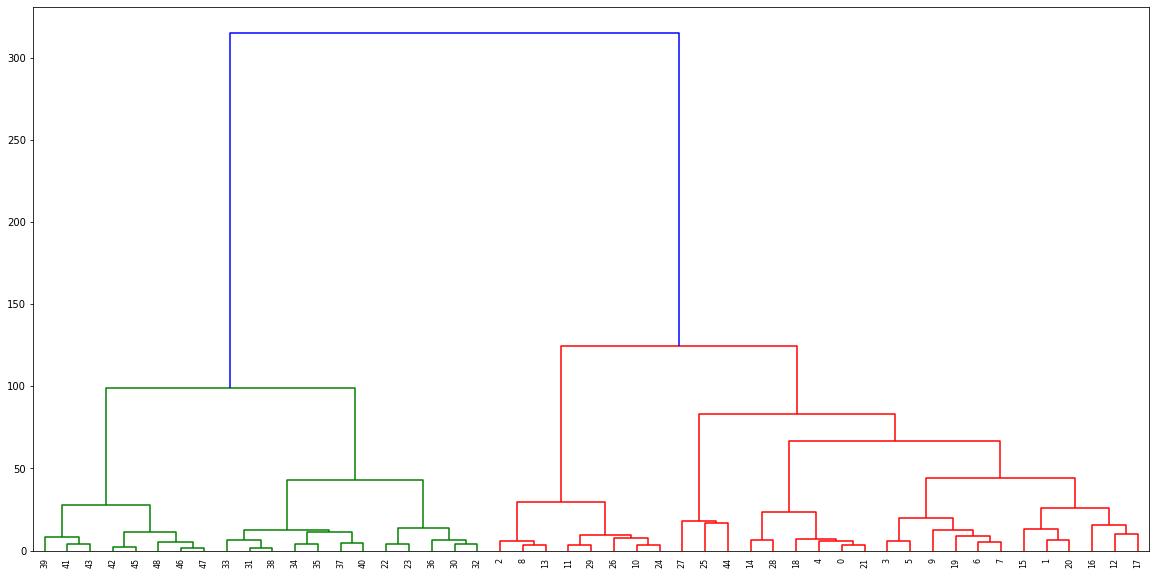

In [ ]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

The labels of leafs are the indices of data points. We can control the number of cluster by adjusting distance_thresold or n_cluster parameters. Let’s check the calculated distances between clusters:

In [ ]:
model.distances_

array([  0.        ,   1.        ,   1.05409255,   1.20185043,
         1.29099445,   1.45296631,   1.56347192,   1.56347192,
         1.73205081,   1.73205081,   1.73205081,   1.76383421,
         2.02758751,   2.23606798,   2.2689531 ,   2.33333333,
         2.44948974,   2.60341656,   2.82842712,   2.96273147,
         3.        ,   3.17979734,   3.24037035,   3.34995854,
         3.48010217,   3.50396601,   3.52766841,   4.12759458,
         4.3758597 ,   4.59468292,   4.76095229,   5.33184503,
         5.37965991,   5.46707316,   5.54276305,   6.28637563,
         6.40312424,   7.33459585,   7.34846923,   7.94011981,
         7.95298686,  12.06709637,  16.99700409,  18.28005727,
        21.23937643,  22.47731367,  44.32924397,  54.83047259,
       113.82291909])

Distances are in ascending order. If we can set the distance_thresold as 0.8, number of clusters will be 49. There are 8 distances greated than 0.8 so, when combined, 49 clusters will be formed.

In [ ]:
model = AgglomerativeClustering(distance_threshold=0.8, n_clusters=None)
model = model.fit(x)
model.n_clusters_

49

**MODEL EVALUATION - CROSS VALIDATION METHOD**

In [ ]:
#We'll work with the same data used in the Unsupervised learning. We load the input data in X and the output data in y.

import pandas as pd

# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/ToHLz/Machine-learning/main/StudentsPerformance.csv')
data.head()




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data['Total'] = data['math score'] + data['reading score'] + data['writing score']

In [ ]:
data['Average'] = data['Total']/3

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
data.drop(['math score', 'reading score', 'writing score', 'Total'],axis = 1, inplace = True)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['parental level of education'] = Le.fit_transform(data['parental level of education'])
data['lunch'] = Le.fit_transform(data['lunch'])
data['test preparation course'] = Le.fit_transform(data['test preparation course'])
data['gender'] = Le.fit_transform(data['gender'])
data['race/ethnicity'] = Le.fit_transform(data['race/ethnicity'])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Average
0,0,1,1,1,1,72.666667
1,0,2,4,1,0,82.333333
2,0,1,3,1,1,92.666667
3,1,0,0,0,1,49.333333
4,1,2,4,1,1,76.333333
...,...,...,...,...,...,...
995,0,4,3,1,0,94.000000
996,1,2,2,0,1,57.333333
997,0,2,2,0,0,65.000000
998,0,3,4,1,0,74.333333


In [ ]:
# Select subset of predictors
cols_to_use = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X = data[cols_to_use]

# Select target
y = data.Average

Then, we define a pipeline that uses an imputer to fill in missing values and a random forest model to make predictions.

While it's possible to do cross-validation without pipelines, it is quite difficult! Using a pipeline will make the code remarkably straightforward.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

We obtain the cross-validation scores with the cross_val_score() function from scikit-learn. We set the number of folds with the cv parameter.

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [12.03086043 11.40899896 11.39713906 11.3366362  11.82926565]


The scoring parameter chooses a measure of model quality to report: in this case, we chose negative mean absolute error (MAE). The docs for scikit-learn show a list of options.

It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

We typically want a single measure of model quality to compare alternative models. So we take the average across experiments.

In [ ]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
11.600580058812557
